<p>Odesa Mechnikov National University</p>
<p>Mykola Zaitsev, Diploma work</p>

$$ A_m = - \frac{G}{2}(m+1) ||U_m||^2$$

$$ D_{mn} = \frac{G}{2\pi} \int_{-1}^{1} \sqrt{1-y^2} U_m(y) \int_{-1}^{1} \tilde{K}(y,n) \sqrt{1-\eta^2} U_n(\eta) \,d \eta \,d y$$

$$ f_m = \int_{-1}^{1} \tilde{f}(y) \sqrt{1-y^2} U_m(y)\,d y $$

$$ A_m c_m + \sum_{n=0}^{\infty} D_{mn} c_n = f_n $$

$$ \tilde{f}(y) = \frac{c_1-c_0}{2} f \left( \frac{(c_1-c_0)y+(c_1+c_0)}{2} \right) $$

$$ \tilde{K}(y, \eta) = \frac{(c_1-c_0)^2}{4} K \left( \frac{(c_1-c_0)y+(c_1+c_0)}{2}, \frac{(c_1-c_0)\eta+(c_1+c_0)}{2} \right) $$

$$ K(y, \eta) = \int_{0}^{\infty} \frac{e^{-\alpha(\eta+y)} + e^{-\alpha(2a+\eta-y)} - e^{-\alpha(2a-\eta-y)} + e^{-\alpha(2a-\eta+y)} }{1+e^{-2 \alpha a}} \alpha \,d \alpha $$

$$ f(y) = q(y) - \frac{1}{\pi} \int_{- \infty}^{\infty} p(\xi) \left( \frac{-2\xi}{\xi^2+(a+y)^2} - \frac{-2\xi}{\xi^2+(a-y)^2} \right) \,d \xi + \frac{2}{\pi} \int_{- \infty}^{\infty} p(\xi) \left( \int_{0}^{A} \frac{e^{-\alpha(\eta+y)} - e^{-\alpha(\eta-y)}}{\alpha(1+e^{-2 \alpha a})} \alpha sin{\alpha \xi} \,d \alpha - \int_{0}^{A} \frac{e^{-\alpha(\eta+y)} - e^{-\alpha(\eta-y)}}{\alpha} \alpha sin{\alpha \xi} \,d \alpha \right) \,d \xi $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import fixed_quad

def p(x):
    return np.where((x > -1) & (x < 1), (x+1)**2, 0)

    
def q(y):
    return np.where((y > -1) & (y < 1), np.cos(y), 0)


A = 50.0
a = 10.0 
G = 79.3 * 1000000000

$$ K(y, \eta) = \int_{0}^{\infty} \frac{e^{-\alpha(\eta+y)} + e^{-\alpha(2a+\eta-y)} - e^{-\alpha(2a-\eta-y)} + e^{-\alpha(2a-\eta+y)} }{1+e^{-2 \alpha a}} \alpha \,d \alpha $$

In [2]:
def integrand_k(alpha, y, eta):
    return (np.exp(-alpha * (eta + y)) + 
            np.exp(-alpha * (2*a + eta - y)) - 
            np.exp(-alpha * (2*a - eta - y)) + 
            np.exp(-alpha * (2*a - eta + y))) * alpha / (1 + np.exp(-2 * alpha * a))

def K(y, eta):
    integral_value, _ = quad(integrand_k, 0, np.inf, args=(y, eta))
    return integral_value

print(K(1, 1))

0.24985544587455985


$$ f(y) = q(y) - \frac{1}{\pi} \int_{- \infty}^{\infty} p(\xi) \left( \frac{-2\xi}{\xi^2+(a+y)^2} - \frac{-2\xi}{\xi^2+(a-y)^2} \right) \,d \xi + \frac{2}{\pi} \int_{- \infty}^{\infty} p(\xi) \left( \int_{0}^{A} \frac{e^{-\alpha(a+y)} - e^{-\alpha(a-y)}}{\alpha(1+e^{-2 \alpha a})} \alpha sin{\alpha \xi} \,d \alpha - \int_{0}^{A} \frac{e^{-\alpha(a+y)} - e^{-\alpha(a-y)}}{\alpha} \alpha sin{\alpha \xi} \,d \alpha \right) \,d \xi $$

In [3]:
def first_integrand(xi, y):
    return p(xi) * (-2 * xi / (xi**2 + (a + y)**2) - (-2 * xi / (xi**2 + (a - y)**2)))

def second_inner_integrand(alpha, y, xi):
    return ((np.exp(-alpha * (a + y)) - np.exp(-alpha * (a - y))) / (alpha * (1 + np.exp(-2 * alpha *a)))) * alpha * np.sin(alpha * xi)

def third_inner_integrand(alpha, y, xi):
    return ((np.exp(-alpha * (a + y)) - np.exp(-alpha * (a - y))) / alpha) * alpha * np.sin(alpha * xi)

def second_outer_integrand(xi, y):
    inner_integral_1, _ = quad(second_inner_integrand, 0, A, args=(y,xi))
    inner_integral_2, _ = quad(third_inner_integrand, 0, A, args=(y,xi))
    return p(xi) * (inner_integral_1 - inner_integral_2)

def f(y):
    first_integral, _ = quad(first_integrand, -1, 1, args=(y))
    second_integral, _ = quad(second_outer_integrand, -1, 1, args=(y))
    return q(y) - (1 / np.pi) * first_integral + (2 / np.pi) * second_integral

print(f(0.5))

0.8759494691398335


$$ \tilde{f}(y) = \frac{c_1-c_0}{2} f \left( \frac{(c_1-c_0)y+(c_1+c_0)}{2} \right) $$

$$ \tilde{K}(y, \eta) = \frac{(c_1-c_0)^2}{4} K \left( \frac{(c_1-c_0)y+(c_1+c_0)}{2}, \frac{(c_1-c_0)\eta+(c_1+c_0)}{2} \right) $$

In [4]:
c0 = 4.0
c1 = 6.0

def f_t(y):
    return (c1-c0)/2 * f(((c1-c0)*y+(c1+c0))/2)

def K_t(y, eta):
    return ((c1-c0)**2)/4 * K(((c1-c0)*y+(c1+c0))/2, ((c1-c0)*eta+(c1+c0))/2)

print(f_t(1))
print(K_t(1, 1))

-0.047147387256085964
-0.004317313357953829


In [5]:
from scipy.special import chebyu
from scipy.special import eval_chebyu

$$ A_m = - \frac{G}{2}(m+1) ||U_m||^2$$

In [6]:
def Am(m):
    return -G/2 * (m+1) * np.pi/2

print(Am(1))

-124564148714.8353


$$ f_m = \int_{-1}^{1} \tilde{f}(y) \sqrt{1-y^2} U_m(y)\,d y $$

In [7]:
def integrand_fm(y, m):
    return f_t(y) * np.sqrt(1 - y**2) * eval_chebyu(m, y)

def fm(m):
    result, _ = quad(integrand_fm, -1, 1, args=(m,))
    return result

print(fm(1))

-0.010863688142922689


$$ D_{mn} = \frac{G}{2\pi} \int_{-1}^{1} \sqrt{1-y^2} U_m(y) \int_{-1}^{1} \tilde{K}(y,n) \sqrt{1-\eta^2} U_n(\eta) \,d \eta \,d y$$

In [8]:
def inner_integrand_D(y, eta, n):
    return K_t(y, eta) * np.sqrt(1 - eta**2) * eval_chebyu(n, eta)

def inner_integral_D(y, n):
    result, _ = quad(inner_integrand_D, -1, 1, args=(y,n))
    return result

def integrand_D(y, n, m):
    return np.sqrt(1 - y**2) * eval_chebyu(m, y) * inner_integral_D(y, n)

def Dmn(m, n):
    result, _ = quad(integrand_D, -1, 1, args=(m, n))
    return (G / (2 * np.pi)) * result

print(Dmn(1, 1))

111457631.69824913


$$ A_m c_m + \sum_{n=0}^{\infty} D_{mn} c_n = f_n $$

In [9]:
n = 8
m = 8
M = np.zeros((m, n))
c=[]
c0 = 0.0
c1 = 2.0

for k in range (16):
    M = np.zeros((m, n))
    for i in range(0, m):  
        for j in range(0, n):
            if j == i:
                M[i][j] = Dmn(i, j) + Am(i)
            else:
                M[i][j] = Dmn(i, j)
                
    F = np.zeros(m)
    for i in range(0, m):
        F[i] = fm(i)
        
    c8 = np.linalg.solve(M, F)
    c.append(c8)
    
    print('c0 = ',c0)
    print('c1 = ',c1)
    print(c)
    
    c0+=0.5
    c1+=0.5

c0 =  0.0
c1 =  2.0
[array([-2.07284886e-11,  1.14657328e-11, -4.36330341e-12,  1.68902634e-12,
       -1.50786808e-12,  1.46781546e-12, -9.44893406e-13,  5.33169345e-13])]
c0 =  0.5
c1 =  2.5
[array([-2.07284886e-11,  1.14657328e-11, -4.36330341e-12,  1.68902634e-12,
       -1.50786808e-12,  1.46781546e-12, -9.44893406e-13,  5.33169345e-13]), array([-3.60944500e-12,  2.63718109e-12, -1.35816465e-12,  3.70422525e-13,
        1.54911410e-13, -2.46090623e-13,  1.03009859e-13,  5.19607984e-14])]
c0 =  1.0
c1 =  3.0
[array([-2.07284886e-11,  1.14657328e-11, -4.36330341e-12,  1.68902634e-12,
       -1.50786808e-12,  1.46781546e-12, -9.44893406e-13,  5.33169345e-13]), array([-3.60944500e-12,  2.63718109e-12, -1.35816465e-12,  3.70422525e-13,
        1.54911410e-13, -2.46090623e-13,  1.03009859e-13,  5.19607984e-14]), array([ 1.87853938e-13,  2.59650368e-14,  6.13615012e-16,  1.39963216e-16,
       -4.13934099e-17,  7.11841095e-18, -1.02603535e-17,  1.74190473e-18])]
c0 =  1.5
c1 =  3.5
[arra

In [11]:
M = np.zeros((m, n))
for i in range(0, m):  
    for j in range(0, n):
        if j == i:
            M[i][j] = Dmn(i, j) + Am(i)
        else:
            M[i][j] = Dmn(i, j)
                
F = np.zeros(m)
for i in range(0, m):
    F[i] = fm(i)
        
c8 = np.linalg.solve(M, F)
c.append(c8)
    
print('c0 = ',c0)
print('c1 = ',c1)
print(c)
    
c0+=0.5
c1+=0.5

c0 =  8.0
c1 =  10.0
[array([-2.07284886e-11,  1.14657328e-11, -4.36330341e-12,  1.68902634e-12,
       -1.50786808e-12,  1.46781546e-12, -9.44893406e-13,  5.33169345e-13]), array([-3.60944500e-12,  2.63718109e-12, -1.35816465e-12,  3.70422525e-13,
        1.54911410e-13, -2.46090623e-13,  1.03009859e-13,  5.19607984e-14]), array([ 1.87853938e-13,  2.59650368e-14,  6.13615012e-16,  1.39963216e-16,
       -4.13934099e-17,  7.11841095e-18, -1.02603535e-17,  1.74190473e-18]), array([ 2.43017588e-13,  2.98431794e-14,  1.10352267e-15,  1.47149453e-16,
       -2.68599506e-17,  4.09585921e-18, -7.67868331e-18,  9.46872808e-19]), array([ 3.07704251e-13,  3.50829433e-14,  1.71004237e-15,  1.81093489e-16,
       -1.66949769e-17,  3.15875516e-18, -6.26323302e-18,  6.37191797e-19]), array([ 3.85069897e-13,  4.22767877e-14,  2.52259970e-15,  2.44384536e-16,
       -6.21381417e-18,  3.21442372e-18, -5.23713516e-18,  5.26399602e-19]), array([ 4.79834571e-13,  5.22793130e-14,  3.67518089e-15,  3.51110

In [20]:
len(c)

17

$$ K_- = \lambda \sum_{n=0}^{\infty} c_n \sqrt{\pi(c_1 - c_0)}(-1)^n(n + 1) \frac{1}{\sqrt{2}} $$
$$ K_+ = \lambda \sum_{n=0}^{\infty} c_n \sqrt{\pi(c_1 - c_0)}(n + 1) \frac{1}{\sqrt{2}} $$

In [50]:
K1 = []
K2 = []
c0 = 0.0
c1 = 2.0
G = 79.3 * 1000000000

for i in range (17):    
    value1 = 0
    value2 = 0
    lam = G/(c1-c0)
    
    for n in range(8):
        value1 += c[i][n] * np.sqrt(np.pi*(c1-c0)) * (n+1)*((-1)**n) * 1/np.sqrt(2)
        value2 += c[i][n] * np.sqrt(np.pi*(c1-c0)) *(n+1) * 1/np.sqrt(2) 
                
    K1.append(lam*value1)
    K2.append(lam*value2)
    
    c0+=0.5
    c1+=0.5
    
print(K1)
print(K2)

[-6.376431665754526, -0.8351467296323695, 0.00961888114718807, 0.013059933438454284, 0.016992661340101398, 0.02157636226947388, 0.027048343890680084, 0.033749747869791145, 0.04218155328369022, 0.05310522771204323, 0.06772728429814467, 0.08805547531475191, 0.11763140259258112, 0.16314535283297127, 0.2381769159085467, 0.3706770142090813, 0.5959532622803781]
[-0.3663001408299822, -0.0346552434197487, 0.01700459560830334, 0.02153643443222147, 0.026960064144592732, 0.033601541161903364, 0.041946215673174664, 0.052730372810916845, 0.06711229567244262, 0.08699867461436597, 0.11570425989216608, 0.15938526867868222, 0.23043185622547105, 0.35628396514179833, 0.6040637139152739, 1.1407953932346455, 1.197112182691702]


In [51]:
print(K1[2:16])
print(K2[2:16])

[0.00961888114718807, 0.013059933438454284, 0.016992661340101398, 0.02157636226947388, 0.027048343890680084, 0.033749747869791145, 0.04218155328369022, 0.05310522771204323, 0.06772728429814467, 0.08805547531475191, 0.11763140259258112, 0.16314535283297127, 0.2381769159085467, 0.3706770142090813]
[0.01700459560830334, 0.02153643443222147, 0.026960064144592732, 0.033601541161903364, 0.041946215673174664, 0.052730372810916845, 0.06711229567244262, 0.08699867461436597, 0.11570425989216608, 0.15938526867868222, 0.23043185622547105, 0.35628396514179833, 0.6040637139152739, 1.1407953932346455]


In [48]:
feature_pairs = [f"({i},{i+2})" for i in np.arange(1, 8.0, 0.5)]
feature_pairs

['(1.0,3.0)',
 '(1.5,3.5)',
 '(2.0,4.0)',
 '(2.5,4.5)',
 '(3.0,5.0)',
 '(3.5,5.5)',
 '(4.0,6.0)',
 '(4.5,6.5)',
 '(5.0,7.0)',
 '(5.5,7.5)',
 '(6.0,8.0)',
 '(6.5,8.5)',
 '(7.0,9.0)',
 '(7.5,9.5)']

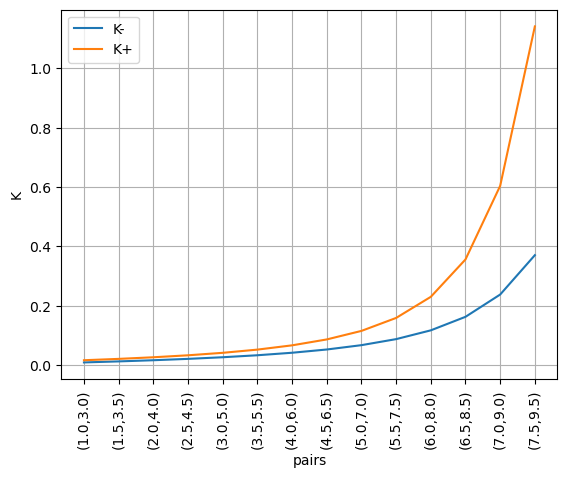

In [49]:
plt.plot(feature_pairs, K1[2:16], label='K-')
plt.plot(feature_pairs, K2[2:16], label='K+')
plt.xlabel('pairs')
plt.ylabel('K')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [33]:
n = 8
m = 8
M = np.zeros((m, n))
cc=[]
c0 = 4.0
c1 = 6.0

for k in range (16):
    M = np.zeros((m, n))
    for i in range(0, m):  
        for j in range(0, n):
            if j == i:
                M[i][j] = Dmn(i, j) + Am(i)
            else:
                M[i][j] = Dmn(i, j)
                
    F = np.zeros(m)
    for i in range(0, m):
        F[i] = fm(i)
        
    c8 = np.linalg.solve(M, F)
    cc.append(c8)
    
    print('c0 = ',c0)
    print('c1 = ',c1)
    print(cc)
    
    c0-=0.25
    c1+=0.25

c0 =  4.0
c1 =  6.0
[array([ 7.53070131e-13,  8.69637338e-14,  8.05463853e-15,  8.41226761e-16,
        7.14591818e-17,  1.17864894e-17, -9.77019650e-19,  1.21665962e-18])]
c0 =  3.75
c1 =  6.25
[array([ 7.53070131e-13,  8.69637338e-14,  8.05463853e-15,  8.41226761e-16,
        7.14591818e-17,  1.17864894e-17, -9.77019650e-19,  1.21665962e-18]), array([9.60294163e-13, 1.38566867e-13, 1.61497313e-14, 2.11798311e-15,
       2.37145005e-16, 4.12139586e-17, 9.40409781e-19, 3.46826367e-18])]
c0 =  3.5
c1 =  6.5
[array([ 7.53070131e-13,  8.69637338e-14,  8.05463853e-15,  8.41226761e-16,
        7.14591818e-17,  1.17864894e-17, -9.77019650e-19,  1.21665962e-18]), array([9.60294163e-13, 1.38566867e-13, 1.61497313e-14, 2.11798311e-15,
       2.37145005e-16, 4.12139586e-17, 9.40409781e-19, 3.46826367e-18]), array([1.18121309e-12, 2.04450986e-13, 2.88315594e-14, 4.56304306e-15,
       6.32497178e-16, 1.19835658e-16, 1.06411439e-17, 8.92195379e-18])]
c0 =  3.25
c1 =  6.75
[array([ 7.53070131e-13, 

/var/folders/9t/nk8b_9113bq5tt6ts3tq3sd80000gn/T/ipykernel_64045/1476463261.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand_fm, -1, 1, args=(m,))


c0 =  0.75
c1 =  9.25
[array([ 7.53070131e-13,  8.69637338e-14,  8.05463853e-15,  8.41226761e-16,
        7.14591818e-17,  1.17864894e-17, -9.77019650e-19,  1.21665962e-18]), array([9.60294163e-13, 1.38566867e-13, 1.61497313e-14, 2.11798311e-15,
       2.37145005e-16, 4.12139586e-17, 9.40409781e-19, 3.46826367e-18]), array([1.18121309e-12, 2.04450986e-13, 2.88315594e-14, 4.56304306e-15,
       6.32497178e-16, 1.19835658e-16, 1.06411439e-17, 8.92195379e-18]), array([1.41973359e-12, 2.86570778e-13, 4.76204364e-14, 8.85236135e-15,
       1.46338635e-15, 3.05540869e-16, 4.16677545e-17, 2.17589911e-17]), array([1.68055849e-12, 3.87518765e-13, 7.44691513e-14, 1.59466939e-14,
       3.06703695e-15, 7.07035883e-16, 1.23656162e-16, 5.13992959e-17]), array([1.96948459e-12, 5.10721866e-13, 1.11945832e-13, 2.72155365e-14,
       5.98426458e-15, 1.52074670e-15, 3.17576655e-16, 1.18464133e-16]), array([2.29382043e-12, 6.60724603e-13, 1.63501801e-13, 4.46271750e-14,
       1.10746447e-14, 3.09355616e

In [35]:
M = np.zeros((m, n))
for i in range(0, m):  
    for j in range(0, n):
        if j == i:
            M[i][j] = Dmn(i, j) + Am(i)
        else:
            M[i][j] = Dmn(i, j)
                
F = np.zeros(m)
for i in range(0, m):
    F[i] = fm(i)
        
c8 = np.linalg.solve(M, F)
cc.append(c8)
    
print('c0 = ',c0)
print('c1 = ',c1)
print(cc)

/var/folders/9t/nk8b_9113bq5tt6ts3tq3sd80000gn/T/ipykernel_64045/3788817119.py:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  first_integral, _ = quad(first_integrand, -1, 1, args=(y))
/var/folders/9t/nk8b_9113bq5tt6ts3tq3sd80000gn/T/ipykernel_64045/3788817119.py:16: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  first_integral, _ = quad(first_integrand, -1, 1, args=(y))


c0 =  0.0
c1 =  10.0
[array([ 7.53070131e-13,  8.69637338e-14,  8.05463853e-15,  8.41226761e-16,
        7.14591818e-17,  1.17864894e-17, -9.77019650e-19,  1.21665962e-18]), array([9.60294163e-13, 1.38566867e-13, 1.61497313e-14, 2.11798311e-15,
       2.37145005e-16, 4.12139586e-17, 9.40409781e-19, 3.46826367e-18]), array([1.18121309e-12, 2.04450986e-13, 2.88315594e-14, 4.56304306e-15,
       6.32497178e-16, 1.19835658e-16, 1.06411439e-17, 8.92195379e-18]), array([1.41973359e-12, 2.86570778e-13, 4.76204364e-14, 8.85236135e-15,
       1.46338635e-15, 3.05540869e-16, 4.16677545e-17, 2.17589911e-17]), array([1.68055849e-12, 3.87518765e-13, 7.44691513e-14, 1.59466939e-14,
       3.06703695e-15, 7.07035883e-16, 1.23656162e-16, 5.13992959e-17]), array([1.96948459e-12, 5.10721866e-13, 1.11945832e-13, 2.72155365e-14,
       5.98426458e-15, 1.52074670e-15, 3.17576655e-16, 1.18464133e-16]), array([2.29382043e-12, 6.60724603e-13, 1.63501801e-13, 4.46271750e-14,
       1.10746447e-14, 3.09355616e-

In [52]:
K1 = []
K2 = []
c0 = 4.0
c1 = 6.0
G = 79.3 * 1000000000

for i in range (17):    
    value1 = 0
    value2 = 0
    lam = G/(c1-c0)
    
    for n in range(8):
        value1 += cc[i][n] * np.sqrt(np.pi*(c1-c0)) * (n+1)*((-1)**n) * 1/np.sqrt(2)
        value2 += cc[i][n] * np.sqrt(np.pi*(c1-c0)) *(n+1) * 1/np.sqrt(2) 
                
    K1.append(lam*value1)
    K2.append(lam*value2)
    
    c0-=0.25
    c1+=0.25
    
print(K1)
print(K2)

[0.04218155328369022, 0.045512915835098165, 0.04837268344824749, 0.05098116927732763, 0.05350488173872258, 0.056085821119480114, 0.05885982192173317, 0.061971024688009184, 0.06558620807705405, 0.06991194916496278, 0.0752186103548206, 0.08188008697765105, 0.0904583961832266, -0.38411667665455246, -0.9444091802823988, -1.5009505517285526, -4.780471469832993]
[0.06711229567244262, 0.08145290547560591, 0.09748495008124435, 0.11585301464464806, 0.1373362856408983, 0.16294349652110146, 0.19403864158943737, 0.23252746210834044, 0.28114899976236984, 0.34394485398891883, 0.4270254677542486, 0.5398124878492266, 0.6969337235860698, 0.9471008737263196, 1.2495272859049107, 1.6184165201694398, 1.613629087154839]


In [55]:
print(K1[:16])
print(K2[:16])

[0.04218155328369022, 0.045512915835098165, 0.04837268344824749, 0.05098116927732763, 0.05350488173872258, 0.056085821119480114, 0.05885982192173317, 0.061971024688009184, 0.06558620807705405, 0.06991194916496278, 0.0752186103548206, 0.08188008697765105, 0.0904583961832266, -0.38411667665455246, -0.9444091802823988, -1.5009505517285526]
[0.06711229567244262, 0.08145290547560591, 0.09748495008124435, 0.11585301464464806, 0.1373362856408983, 0.16294349652110146, 0.19403864158943737, 0.23252746210834044, 0.28114899976236984, 0.34394485398891883, 0.4270254677542486, 0.5398124878492266, 0.6969337235860698, 0.9471008737263196, 1.2495272859049107, 1.6184165201694398]


In [53]:
feature_pairs=[]
c0 = 4.0
c1 = 6.0

for i in range (16):
    feature_pairs.append(f"({c0},{c1})")
    c0-=0.25
    c1+=0.25
    
feature_pairs

['(4.0,6.0)',
 '(3.75,6.25)',
 '(3.5,6.5)',
 '(3.25,6.75)',
 '(3.0,7.0)',
 '(2.75,7.25)',
 '(2.5,7.5)',
 '(2.25,7.75)',
 '(2.0,8.0)',
 '(1.75,8.25)',
 '(1.5,8.5)',
 '(1.25,8.75)',
 '(1.0,9.0)',
 '(0.75,9.25)',
 '(0.5,9.5)',
 '(0.25,9.75)']

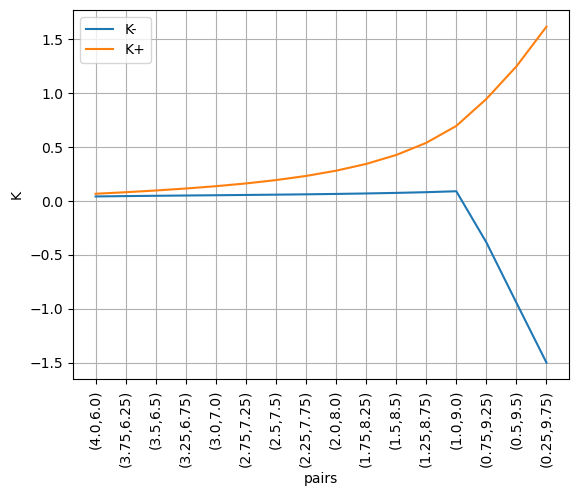

In [56]:
plt.plot(feature_pairs, K1[:16], label='K-')
plt.plot(feature_pairs, K2[:16], label='K+')
plt.xlabel('pairs')
plt.ylabel('K')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()